In [1]:
import cv2
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import copy
from numba import jit, njit, vectorize, cuda, uint32, f8,uint8
import h5py
import cairosvg
from PIL import Image
from sklearn.model_selection import train_test_split
import joblib
from PIL import Image
import scipy as sci
import random
import scipy as sci
import keras
import h5py
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

2023-11-04 21:07:42.307030: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-04 21:07:42.307063: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-04 21:07:42.308827: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-04 21:07:42.467931: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
directorio = "/home/theTarnished/Desktop/theTarnished/AI/train/copia/Upb_dataset"
archivos = os.listdir(directorio)
archivos

['Pablo_Romero_Zarate',
 'Paul',
 'Dylan_J',
 'Jose_luis',
 'Miguel',
 'Cami',
 'Samu',
 'Cecilia_Tapia',
 'Ignacio',
 'Hugo_docente',
 'Gabriel',
 'Ingles',
 'Natalie_Olmos',
 'Bartos',
 'Denisse Estremadoyro',
 'Dylan_C',
 'Sebas',
 'Alvaro_Moscoso',
 'Oscar_Valdivieso',
 'Patri_cafe',
 'Sandra_Ibañez',
 'Jonathan_Capra',
 'Hugo',
 'Juan_Carlos_Duran',
 'Rector_upb',
 'Pablo',
 'Richard',
 'Ari',
 'Cynthia_Gariela_Diaz',
 'Alexis',
 'Joseph',
 'Marcos',
 'Alex',
 'Oscar_Molina_Tejerina',
 'Mauri',
 'Erwin',
 'Camilo',
 'Jose',
 'Alejandra',
 'Tommy']

In [3]:
def norm_appFilt_exp(dim,i):
  trainx = []
  trainy = []
  #for i in range(len(archivos)):
  subdirectorio = os.path.join(directorio, archivos[i])
  files = os.listdir(subdirectorio)
  for j in range(len(files)):
      joinImage = os.path.join(subdirectorio, files[j])

      if joinImage.lower().endswith('.svg'):
            archivo_jpeg = os.path.splitext(joinImage)[0] + '.jpg'
            cairosvg.svg2png(url=joinImage, write_to='temp.png')
            imagen_temporal = Image.open('temp.png').convert('RGB')
            imagen_temporal.save(archivo_jpeg, 'JPEG')
            imagen_temporal.close()
            os.remove('temp.png')
            #charge = cv2.imread(archivo_jpeg,cv2.IMREAD_GRAYSCALE)
            #charge = np.asarray(Image.open(archivo_jpeg))
            charge = cv2.imread(archivo_jpeg)
      elif joinImage.lower().endswith(('.jpeg', '.jpg', '.png', '.jpeg')):
            #charge = np.asarray(Image.open(joinImage))
            #charge = cv2.imread(joinImage,cv2.IMREAD_GRAYSCALE)
            charge = cv2.imread(joinImage)
            print(joinImage)
      #charge = expansion(charge,dim,True)
      imagereduce = cv2.resize(charge, (dim, dim), interpolation=cv2.INTER_AREA)
      filtros(imagereduce,trainx,[i],trainy)
      print(str(i)+" - "+ str(j))
      trainx += [imagereduce]
        #trainy += [i]

  trainx=np.asarray(trainx)
    #trainy=np.asarray(trainy)

  trainx = np.array(tf.cast(trainx,tf.float32)/255.)


  np.save(archivos[i],trainx)
    #np.save(archivos[i], trainy)
  #return trainx,trainy

In [4]:
def expansion(m,dim,color):
  if dim > len(m) or dim > len(m[0]):
    if color:
      shape = (dim, dim, 3)
    else:
      sahpe = (dim, dim, 1)

    diferencia = [(n - o) if (n - o) > 0 else 0 for n, o in zip(shape, m.shape)]
    mn = np.pad(m, ((0, diferencia[0]), (0, diferencia[1]), (0, diferencia[2])), mode='constant')
    return mn
  else:
    return m


In [5]:
def filtros(m,x,i,y):
  rep=7
  a = g_blur(m)
  x += [a]
  y += i
  for j in range(rep):
    x += [rotacion(a,len(a))]
    y += i

  a = m_blur(m)
  x += [a]
  y += i
  for j in range(rep):
    x += [rotacion(a,len(a))]
    y += i

  a = cf_blur(m,len(m))
  x += [a]
  y += i
  for j in range(rep):
    x += [rotacion(a,len(a))]
    y += i

  a = e_blur(m)
  x += [a]
  y += i
  for j in range(rep):
    x += [rotacion(a,len(a))]
    y += i

  a = d_blur(m)
  x += [a]
  y += i
  for j in range(rep):
    x += [rotacion(a,len(a))]
    y += i

  a = con_1(m)
  x += [a]
  y += i
  for j in range(rep):
    x += [rotacion(a,len(a))]
    y += i

  a = con_3(m)
  x += [a]
  y += i
  for j in range(rep):
    x += [rotacion(a,len(a))]
    y += i




def rotacion(m,dim):
  ax=1
  bx=0
  cx=0
  ay=0
  by=1
  cy=0
  if random.randint(0,1)==1:
    bx= random.uniform(-0.3,0.6)
  else:
    ay= random.uniform(-0.3,0.6)

  s = random.randint(1, 6)

  if s ==1:
    ax= random.uniform(0.9,1.4)

  if s ==2:
    bx= random.uniform(-0.3,0.4)

  if s ==3:
    cx= random.uniform(0,1)

  if s ==4:
    ay= random.uniform(-0.3,0.5)

  if s ==5:
    by= random.uniform(0.8,1.4)

  if s ==6:
    cy= random.uniform(0,1)

  Traslation=np.array([[ax,bx,cx],[ay,by,cy]],dtype=np.float32)
  return cv2.warpAffine(m,Traslation,(dim,dim))


def g_blur(m):
    a=random.randint(1,5)
    b=random.randint(1,5)
    if a % 2 == 0:
      a += 1
    if b % 2 == 0:
      b += 1
    if a == b:
      b = 1
    return cv2.GaussianBlur(m,(a,b),2)

def m_blur(m):
  a=random.randint(1,5)
  if a % 2 == 0:
      a += 1
  return cv2.medianBlur(m,a)

def cf_blur(m,dim):
  fftD=sci.fft.fftshift(sci.fft.fft(np.reshape(m,(dim*dim*3))))
  noise=np.random.normal(size=len(fftD))*random.randint(28,70)
  fD=fftD+noise
  imagen=sci.fft.ifft(sci.fft.ifftshift(fD))
  return np.reshape(np.real(imagen),(dim,dim,3))

def e_blur(m):
  a=random.randint(1,3)
  b=random.randint(1,3)
  if a % 2 == 0:
      a += 1
  if b % 2 == 0:
      b += 1
  kernel=np.ones((a,b),np.uint8)
  return cv2.erode(m,kernel)

def d_blur(m):
  a=random.randint(1,3)
  b=random.randint(1,3)
  kernel=np.ones((a,b))
  return cv2.dilate(m,kernel)

def con_1(m):
  k = np.array([[-1, -1, -1],
                    [-1, 8, -1],
                    [-1, -1, -1]])
  return cv2.filter2D(m, ddepth=-1, kernel=k)

'''
def con_2(m):
  k = np.array([[0, 0, 0],
                    [0, 1, 0],
                    [0, 0, 0]])
  return cv2.filter2D(m, ddepth=-1, kernel=k)
'''
def con_3(m):
  k = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])

  return cv2.filter2D(m, ddepth=-1, kernel=k)

In [6]:
%cd /home/theTarnished/Desktop/theTarnished/AI/faceDetection/py/

/home/theTarnished/Desktop/theTarnished/AI/faceDetection/py


In [7]:
def load_db(y,x,i,j):
  n = np.load(archivos[i]+ '.npy')
  x = np.concatenate((x,n),axis = 0)
  y += [j]*len(n)
  return x,y

In [20]:
!ls

In [21]:

directorio = "/home/theTarnished/Desktop/theTarnished/AI/train/copia/Upb_dataset"
archivos = os.listdir(directorio)
for i in range(len(archivos)):
    norm_appFilt_exp(200,i)

/home/theTarnished/Desktop/theTarnished/AI/train/copia/Upb_dataset/Pablo_Romero_Zarate/Screenshot 2023-10-22 211651.jpeg
0 - 0
/home/theTarnished/Desktop/theTarnished/AI/train/copia/Upb_dataset/Pablo_Romero_Zarate/DSC_0944.jpeg
0 - 1
/home/theTarnished/Desktop/theTarnished/AI/train/copia/Upb_dataset/Pablo_Romero_Zarate/Screenshot 2023-10-22 212102.jpeg
0 - 2
/home/theTarnished/Desktop/theTarnished/AI/train/copia/Upb_dataset/Paul/20231023_131919.jpeg
1 - 0
/home/theTarnished/Desktop/theTarnished/AI/train/copia/Upb_dataset/Paul/20231023_131910.jpeg
1 - 1
/home/theTarnished/Desktop/theTarnished/AI/train/copia/Upb_dataset/Paul/IMG-20231019-WA0026.jpeg
1 - 2
/home/theTarnished/Desktop/theTarnished/AI/train/copia/Upb_dataset/Dylan_J/BE8DEB5C-7468-4AF5-82E7-15A08DFB2BF8.png
2 - 0
/home/theTarnished/Desktop/theTarnished/AI/train/copia/Upb_dataset/Dylan_J/FA877E3F-0EA5-4E3A-A15F-05B6BDD47EA1.png
2 - 1
/home/theTarnished/Desktop/theTarnished/AI/train/copia/Upb_dataset/Dylan_J/20231018_151818.jpe

/home/theTarnished/Desktop/theTarnished/AI/train/copia/Upb_dataset/Rector_upb/IMG-20231019-WA0048.jpeg
24 - 0
/home/theTarnished/Desktop/theTarnished/AI/train/copia/Upb_dataset/Rector_upb/IMG-20231019-WA0044.jpeg
24 - 1
/home/theTarnished/Desktop/theTarnished/AI/train/copia/Upb_dataset/Rector_upb/IMG-20231019-WA0042.jpeg
24 - 2
/home/theTarnished/Desktop/theTarnished/AI/train/copia/Upb_dataset/Pablo/20231023_144437.jpeg
25 - 0
/home/theTarnished/Desktop/theTarnished/AI/train/copia/Upb_dataset/Pablo/20231023_144416.jpeg
25 - 1
/home/theTarnished/Desktop/theTarnished/AI/train/copia/Upb_dataset/Pablo/20231023_144433.jpeg
25 - 2
/home/theTarnished/Desktop/theTarnished/AI/train/copia/Upb_dataset/Richard/20231023_144541.jpeg
26 - 0
/home/theTarnished/Desktop/theTarnished/AI/train/copia/Upb_dataset/Richard/20231023_144539.jpeg
26 - 1
/home/theTarnished/Desktop/theTarnished/AI/train/copia/Upb_dataset/Richard/20231023_144534.jpeg
26 - 2
/home/theTarnished/Desktop/theTarnished/AI/train/copia/Upb

In [8]:
for i in range(len(archivos)):
    print(i)
    print(archivos[i])

0
Pablo_Romero_Zarate
1
Paul
2
Dylan_J
3
Jose_luis
4
Miguel
5
Cami
6
Samu
7
Cecilia_Tapia
8
Ignacio
9
Hugo_docente
10
Gabriel
11
Ingles
12
Natalie_Olmos
13
Bartos
14
Denisse Estremadoyro
15
Dylan_C
16
Sebas
17
Alvaro_Moscoso
18
Oscar_Valdivieso
19
Patri_cafe
20
Sandra_Ibañez
21
Jonathan_Capra
22
Hugo
23
Juan_Carlos_Duran
24
Rector_upb
25
Pablo
26
Richard
27
Ari
28
Cynthia_Gariela_Diaz
29
Alexis
30
Joseph
31
Marcos
32
Alex
33
Oscar_Molina_Tejerina
34
Mauri
35
Erwin
36
Camilo
37
Jose
38
Alejandra
39
Tommy


In [8]:
y=[]
indice =0
x=np.load(archivos[indice] + '.npy')
y += [0]*len(x)
for i in range(indice+1,40):
    print(i)
    x,y=load_db(y,x,i,i-indice)
y= np.asarray(y)
x.shape

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


(6897, 200, 200, 3)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
sh=200
dimension=3
model=tf.keras.Sequential()
#model = Sequential()
model.add(tf.keras.layers.Conv2D(input_shape=(sh, sh, dimension), filters=96, kernel_size=(7, 7), strides=4, padding='valid', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(tf.keras.layers.LayerNormalization())
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(5, 5), strides=1, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(tf.keras.layers.LayerNormalization())
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(tf.keras.layers.LayerNormalization())

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=512, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.30))
model.add(tf.keras.layers.Dense(units=512, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.30))
model.add(tf.keras.layers.Dense(units=40, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 49, 49, 96)        14208     
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 96)        0         
 D)                                                              
                                                                 
 layer_normalization (Layer  (None, 24, 24, 96)        192       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 256)       0         
 g2D)                                                            
                                                        

2023-11-04 20:52:08.964909: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-04 20:52:09.198059: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-04 20:52:09.198277: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [11]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3) # Callback for earlystopping
model.compile(optimizer='sgd', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), callbacks=[callback])

2023-11-04 20:52:16.641036: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 2648160000 exceeds 10% of free system memory.
2023-11-04 20:52:18.803208: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 2648160000 exceeds 10% of free system memory.


Epoch 1/20


/home/theTarnished/anaconda3/envs/IA/lib/python3.9/site-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-11-04 20:52:20.139750: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8902
2023-11-04 20:52:21.385888: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f81e48c93f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-04 20:52:21.385912: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 2060, Compute Capability 7.5
2023-11-04 20:52:21.428219: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


173/173 [==============================] - ETA: 0s - loss: 3.5942 - accuracy: 0.0656

2023-11-04 20:52:26.004736: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 662400000 exceeds 10% of free system memory.
2023-11-04 20:52:26.241449: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 662400000 exceeds 10% of free system memory.


173/173 [==============================] - 8s 29ms/step - loss: 3.5942 - accuracy: 0.0656 - val_loss: 3.1851 - val_accuracy: 0.1413
Epoch 2/20
173/173 [==============================] - 4s 24ms/step - loss: 2.7932 - accuracy: 0.2418 - val_loss: 1.9364 - val_accuracy: 0.4652
Epoch 3/20
173/173 [==============================] - 4s 23ms/step - loss: 1.7620 - accuracy: 0.5151 - val_loss: 1.1189 - val_accuracy: 0.7159
Epoch 4/20
173/173 [==============================] - 4s 24ms/step - loss: 1.0927 - accuracy: 0.6940 - val_loss: 0.7276 - val_accuracy: 0.7899
Epoch 5/20
173/173 [==============================] - 4s 24ms/step - loss: 0.7871 - accuracy: 0.7825 - val_loss: 0.5882 - val_accuracy: 0.8478
Epoch 6/20
173/173 [==============================] - 4s 24ms/step - loss: 0.6171 - accuracy: 0.8296 - val_loss: 0.4750 - val_accuracy: 0.8645
Epoch 7/20
173/173 [==============================] - 4s 24ms/step - loss: 0.5105 - accuracy: 0.8592 - val_loss: 0.5180 - val_accuracy: 0.8594
Epoch 8/20

In [12]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(test_acc)

2023-11-04 20:54:04.594344: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 662400000 exceeds 10% of free system memory.


44/44 - 1s - loss: 0.0843 - accuracy: 0.9761 - 632ms/epoch - 14ms/step
0.9760869741439819


In [13]:
%cd /home/theTarnished/Desktop/theTarnished/AI/faceDetection/save/
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(test_acc)

/home/theTarnished/Desktop/theTarnished/AI/faceDetection/save
44/44 - 1s - loss: 0.0843 - accuracy: 0.9761 - 528ms/epoch - 12ms/step
0.9760869741439819


In [14]:
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

print(f"Clase predicha: {predicted_labels[0]}")
print(predicted_labels)

44/44 [==============================] - 1s 11ms/step
Clase predicha: 4
[ 4 21 17 ... 14 20  5]


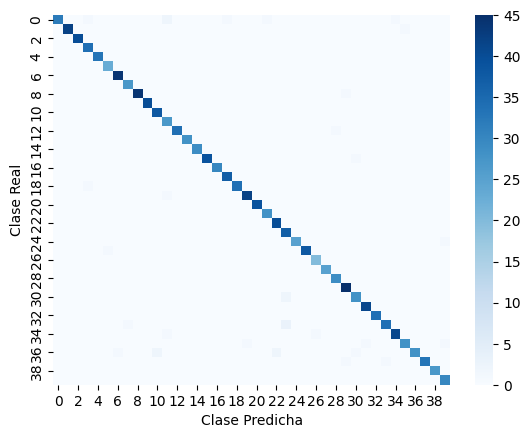

In [20]:
confusion = confusion_matrix(y_test, predicted_labels)

sns.heatmap(confusion, annot=False, cmap='Blues')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

In [21]:
print(classification_report(y_test, predicted_labels,))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91        38
           1       1.00      0.98      0.99        43
           2       1.00      1.00      1.00        40
           3       0.94      1.00      0.97        34
           4       1.00      1.00      1.00        33
           5       0.96      1.00      0.98        23
           6       0.98      1.00      0.99        44
           7       0.96      1.00      0.98        27
           8       1.00      0.98      0.99        45
           9       1.00      1.00      1.00        40
          10       0.95      1.00      0.97        38
          11       0.87      1.00      0.93        27
          12       1.00      0.97      0.99        35
          13       1.00      1.00      1.00        28
          14       1.00      1.00      1.00        29
          15       1.00      0.97      0.99        40
          16       1.00      1.00      1.00        30
          17       0.97    

In [23]:
model.save('modelTrain')

INFO:tensorflow:Assets written to: modelTrain/assets


INFO:tensorflow:Assets written to: modelTrain/assets
